In [1]:
%load_ext autoreload
%autoreload 2

from rcwa import Source, Layer, LayerStack, Crystal, Solver, RectangularGrating
from rcwa.shorthand import complexArray
import numpy as np
import matplotlib.pyplot as plt

In [3]:
reflection_layer = Layer(er=1.0, ur=1.0)
transmission_layer = Layer(er=5.00237**2, ur=1.0)

wavelength = 0.5
deg = np.pi / 180
k0 = 2*np.pi/wavelength
theta = -45 * deg
phi = 0 * deg
# pTEM = 1/np.sqrt(2)*complexArray([1,1j])
pTEM = complexArray([1, 0]) #TE = 100%, y-component only, 
source = Source(wavelength=wavelength, theta=theta, phi=phi, pTEM=pTEM, layer=reflection_layer)

print(f"X amplitude of source = {source.pX}")
print(f"Y amplitude of source = {source.pY}")

X amplitude of source = (-0+0j)
Y amplitude of source = (-1+0j)


In [20]:
reflection_layer = Layer(er=1.0, ur=1.0)
transmission_layer = Layer(er=5.00237**2, ur=1.0)

wavelength = 0.5
deg = np.pi / 180
k0 = 2*np.pi/wavelength
theta = -45 * deg
phi = 1*deg
pTEM = 1/np.sqrt(2)*complexArray([1,1j])
source = Source(wavelength=wavelength, theta=theta, phi=phi, pTEM=pTEM, layer=reflection_layer)

crystal_thickness = 0.5

N_harmonics = 81

period = 0.5

F = 0.05
f0 = 0.016
Nx = 50000

air_layer = Layer(er=1.0, ur=1.0, thickness=0.35)
grating_layer_top = RectangularGrating(period=period, thickness=0.15, er=1.497**2, er_void=1, nx=Nx, groove_width=0.25)
oxide_sandwich_layer = Layer(er=1.46766**2, thickness=0.05)
substrate_layer = Layer(er=5.00237**2, thickness=0.7)

intentional_offset_arr = np.array([F + f0, -F + f0, F - f0, -F - f0])
offset_arr = np.arange(-5, 6)/1E3
solver_matrix = np.full((len(offset_arr), len(intentional_offset_arr)), None, dtype=None)
results_matrix = np.full((len(offset_arr), len(intentional_offset_arr)), None, dtype=None)
layer_stack_matrix = np.full((len(offset_arr), len(intentional_offset_arr)), None, dtype=None)

for i in range(len(offset_arr)):
    for j in range(len(intentional_offset_arr)):
        tot_off = intentional_offset_arr[j] + offset_arr[i]
        
        grating_layer_bottom = RectangularGrating(period=period, thickness=0.15, er=5.00237**2, er_void=1.46766**2, nx=Nx, offset=tot_off, groove_width=0.25)
        layer_stack = LayerStack(air_layer, grating_layer_top, oxide_sandwich_layer, grating_layer_bottom, substrate_layer, incident_layer=reflection_layer, transmission_layer=transmission_layer)
        layer_stack_matrix[i, j] = layer_stack
        solver_1d = Solver(layer_stack, source, N_harmonics)
        results = solver_1d.solve()
        solver_matrix[i, j] = solver_1d
        results_matrix[i, j] = results


1/1 |############################################################|Time: 0:00:02
1/1 |############################################################|Time: 0:00:02
1/1 |############################################################|Time: 0:00:02
1/1 |############################################################|Time: 0:00:02
1/1 |############################################################|Time: 0:00:02
1/1 |############################################################|Time: 0:00:02
1/1 |############################################################|Time: 0:00:02
1/1 |############################################################|Time: 0:00:02
1/1 |############################################################|Time: 0:00:02
1/1 |############################################################|Time: 0:00:02
1/1 |############################################################|Time: 0:00:02
1/1 |############################################################|Time: 0:00:01
1/1 |###################################

In [8]:
tot_off = -0.039
        
grating_layer_bottom = RectangularGrating(period=period, thickness=0.15, er=5.00237**2, er_void=1.46766**2, nx=Nx, offset=tot_off, groove_width=0.25)
layer_stack = LayerStack(air_layer, grating_layer_top, oxide_sandwich_layer, grating_layer_bottom, substrate_layer, incident_layer=reflection_layer, transmission_layer=transmission_layer)
solver_1d = Solver(layer_stack, source, N_harmonics)
results = solver_1d.solve()


1/1 |############################################################|Time: 0:00:05


In [9]:
results["R"]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Plotting the Geometry

KeyboardInterrupt: 

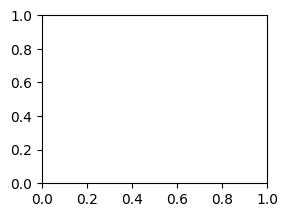

In [21]:
plt.figure()
plt.subplot(221)
er_matrix_global, ur_matrix_global = layer_stack_matrix[0, 1].er_ur_geometry(Nx)
plt.imshow(er_matrix_global, 
           aspect=1, 
           extent=(0, period, layer_stack.total_thickness, 0), 
           cmap=plt.get_cmap("YlGn"), 
           norm="log")
plt.xlabel("x (um)")
plt.ylabel("z (um)")
plt.title(r"$\varepsilon_r$")
plt.colorbar()

plt.subplot(222)
er_matrix_global, ur_matrix_global = layer_stack_matrix[1, 1].er_ur_geometry(Nx)
plt.imshow(er_matrix_global, 
           aspect=1, 
           extent=(0, period, layer_stack.total_thickness, 0), 
           cmap=plt.get_cmap("YlGn"), 
           norm="log")
plt.xlabel("x (um)")
plt.ylabel("z (um)")
plt.title(r"$\varepsilon_r$")
plt.colorbar()

In [10]:
solver_matrix[0, 1].n_harmonics

161

# Run algorithm defined in Lumerical example

In [49]:
eps_arr = np.empty_like(offset_arr)
for i in range(len(offset_arr)):
    # S1, 2, 3, 4
    S1234 = np.empty((4,))
    for j in range(4):
        solver_1d = solver_matrix[i, j]
        # RPower = np.square(np.abs(solver_1d.rx)) + np.square(np.abs(solver_1d.ry)) + np.square(np.abs(solver_1d.rz))
        _, reflectedEy, _ = solver_1d.reflectedElectricComponents_1D()

        RPower = results_matrix[i, j]["R"]
        zeroOrderIndex = solver_1d.n_harmonics // 2
        # S1234[j] = np.square(np.abs(reflectedEy[zeroOrderIndex]))
        # S1234[j] = np.abs(reflectedEy[zeroOrderIndex])
        S1234[j] = RPower[zeroOrderIndex]
    # D1, 2
    D1 = S1234[0] - S1234[1] # S1 - S2
    D2 = S1234[2] - S1234[3] # S3 - S4
    eps_arr[i] = f0*(D1+D2)/(D1-D2)

In [56]:
S1234_matrix = np.empty((len(offset_arr), 4))
for i in range(len(offset_arr)):
    # S1, 2, 3, 4
    for j in range(4):
        solver_1d = solver_matrix[i, j]
        # RPower = np.square(np.abs(solver_1d.rx)) + np.square(np.abs(solver_1d.ry)) + np.square(np.abs(solver_1d.rz))
        _, reflectedEy, _ = solver_1d.reflectedElectricComponents_1D()

        RPower = results_matrix[i, j]["R"]
        zeroOrderIndex = solver_1d.n_harmonics // 2
        S1234_matrix[i, j] = np.square(np.abs(reflectedEy[zeroOrderIndex]))
        # S1234_matrix[i, j] = RPower[zeroOrderIndex]
    # D1, 2
    # D1 = S1234[0] - S1234[1] # S1 - S2
    # D2 = S1234[2] - S1234[3] # S3 - S4
    # eps_arr[i] = f0*(D1+D2)/(D1-D2)

In [ ]:
np.square(np.abs(reflectedEy))[38:43]

array([1.36566837e-05, 1.01104177e-01, 3.05019148e-02, 3.23880325e-08,
       9.76113583e-15])

In [ ]:
RPower

In [63]:
3.097E-8/5E-7

0.06194

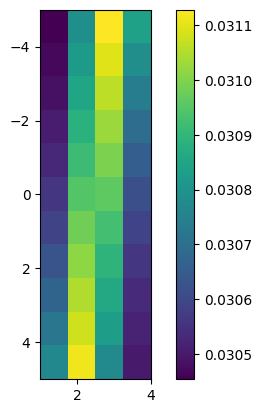

In [58]:
plt.imshow(S1234_matrix, extent=(1, 4, 5, -5))
plt.colorbar()

Text(0, 0.5, 'Measured overlay (nm)')

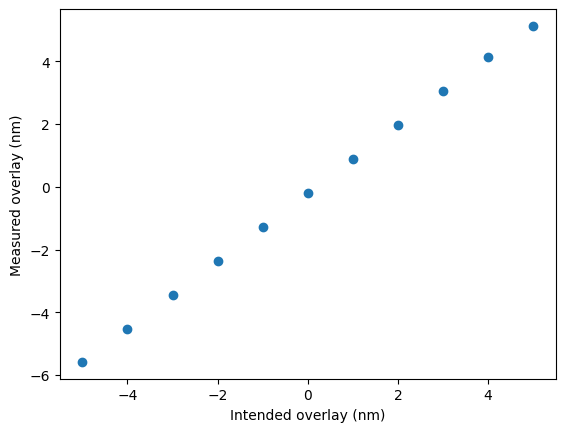

In [52]:
plt.scatter(offset_arr*1E3, eps_arr*1E3)
plt.xlabel("Intended overlay (nm)")
plt.ylabel("Measured overlay (nm)")

/var/folders/pm/htjwb3gx235c3lr_m_kztdqw0000gn/T/ipykernel_99960/396729964.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.scatter(offset_arr*1E3, (eps_arr-offset_arr)/offset_arr)


Text(0, 0.5, '(Measured - Intended)/Intended (nm)')

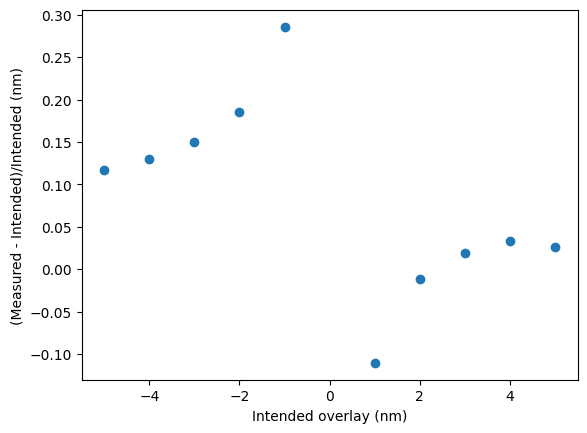

In [55]:
plt.scatter(offset_arr*1E3, (eps_arr-offset_arr)/offset_arr)
plt.xlabel("Intended overlay (nm)")
plt.ylabel("(Measured - Intended)/Intended (nm)")

# What about the first order method?

In [107]:
reflection_layer = Layer(er=1.0, ur=1.0)
transmission_layer = Layer(er=9.0, ur=1.0)

wavelength = 0.5
deg = np.pi / 180
k0 = 2*np.pi/wavelength
theta = 45 * deg
phi = 1*deg
pTEM = 1/np.sqrt(2)*complexArray([1,1j])
source = Source(wavelength=wavelength, theta=theta, phi=phi, pTEM=pTEM, layer=reflection_layer)

crystal_thickness = 0.5

N_harmonics = 161

period = 0.5

F = 0.05
f0 = 0.016
Nx = 50000

air_layer = Layer(er=1.0, ur=1.0, thickness=0.35)
grating_layer_top = RectangularGrating(period=period, thickness=0.15, er=1.497**2, er_void=1, nx=Nx, groove_width=0.25)
oxide_sandwich_layer = Layer(er=1.46766**2, thickness=0.05)
substrate_layer = Layer(er=5.00237**2, thickness=0.7)

intentional_offset_1stOrder_arr = np.array([f0, -f0])
offset_arr = np.arange(-5, 6)/1E3
solver_1stOrder_matrix = np.full((len(offset_arr), len(intentional_offset_1stOrder_arr)), None, dtype=None)
results_1stOrder_matrix = np.full((len(offset_arr), len(intentional_offset_1stOrder_arr)), None, dtype=None)
layer_stack_1stOrder_matrix = np.full((len(offset_arr), len(intentional_offset_1stOrder_arr)), None, dtype=None)

for i in range(len(offset_arr)):
    for j in range(len(intentional_offset_1stOrder_arr)):
        tot_off = intentional_offset_1stOrder_arr[j] + offset_arr[i]
        
        grating_layer_bottom = RectangularGrating(period=period, thickness=0.15, er=5.00237**2, er_void=1.46766**2, nx=Nx, offset=tot_off, groove_width=0.25)
        layer_stack = LayerStack(air_layer, grating_layer_top, oxide_sandwich_layer, grating_layer_bottom, substrate_layer, incident_layer=reflection_layer, transmission_layer=transmission_layer)
        layer_stack_1stOrder_matrix[i, j] = layer_stack
        solver_1d = Solver(layer_stack, source, N_harmonics)
        results = solver_1d.solve()
        solver_1stOrder_matrix[i, j] = solver_1d
        results_1stOrder_matrix[i, j] = results


1/1 |############################################################|Time: 0:00:03
1/1 |############################################################|Time: 0:00:03
1/1 |############################################################|Time: 0:00:03
1/1 |############################################################|Time: 0:00:03
1/1 |############################################################|Time: 0:00:03
1/1 |############################################################|Time: 0:00:03
1/1 |############################################################|Time: 0:00:03
1/1 |############################################################|Time: 0:00:03
1/1 |############################################################|Time: 0:00:03
1/1 |############################################################|Time: 0:00:03
1/1 |############################################################|Time: 0:00:03
1/1 |############################################################|Time: 0:00:04
1/1 |###################################

In [108]:
S1234_matrix_1stOrder = np.empty((len(offset_arr), 4))
for i in range(len(offset_arr)):
    # S1, 2, 3, 4
    solver_1d = solver_1stOrder_matrix[i, 0]
    RPower = results_1stOrder_matrix[i, 0]["R"]
    negative1OrderIndex = solver_1d.n_harmonics // 2 - 1
    positive1OrderIndex = solver_1d.n_harmonics // 2 + 1
    S1234_matrix_1stOrder[i, 0] = RPower[negative1OrderIndex]
    S1234_matrix_1stOrder[i, 1] = RPower[positive1OrderIndex]

    solver_1d = solver_1stOrder_matrix[i, 1]
    RPower = results_1stOrder_matrix[i, 1]["R"]
    negative1OrderIndex = solver_1d.n_harmonics // 2 - 1
    positive1OrderIndex = solver_1d.n_harmonics // 2 + 1
    S1234_matrix_1stOrder[i, 2] = RPower[negative1OrderIndex]
    S1234_matrix_1stOrder[i, 3] = RPower[positive1OrderIndex]

In [114]:
# D1, 2
D1_1stOrder = S1234_matrix_1stOrder[:, 1] - S1234_matrix_1stOrder[:, 0] # S1+1 - S1-1
D2_1stOrder = S1234_matrix_1stOrder[:, 3] - S1234_matrix_1stOrder[:, 2] # S2+1 - S2-1
eps_1stOrder = f0*(D1_1stOrder+D2_1stOrder)/(D1_1stOrder-D2_1stOrder)

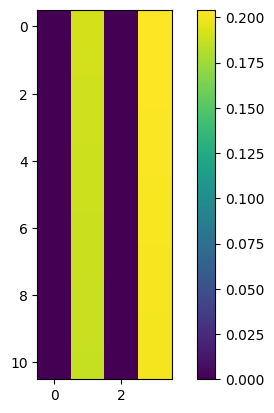

In [120]:
plt.imshow(S1234_matrix_1stOrder)
plt.colorbar()

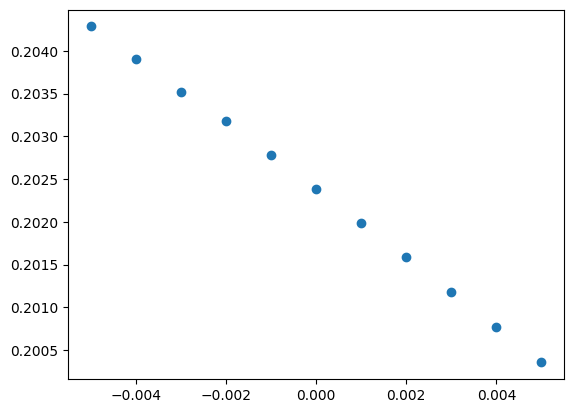

In [127]:
plt.scatter(offset_arr, S1234_matrix_1stOrder[:, 3])

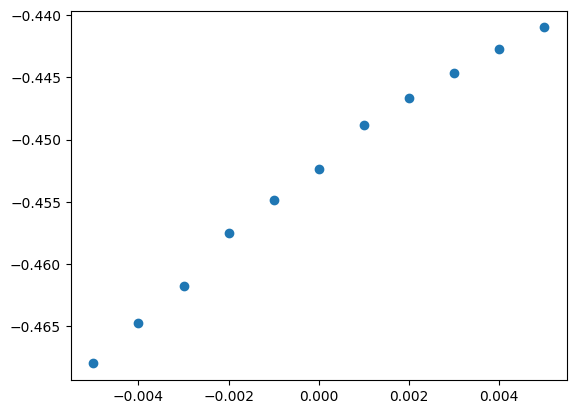

In [116]:
plt.scatter(offset_arr, eps_1stOrder)

In [ ]:
eps_arr = np.empty_like(offset_arr)
for i in range(len(offset_arr)):
    # S1, 2, 3, 4
    S1234 = np.empty((4,))
    for j in range(4):
        solver_1d = solver_matrix[i, j]
        # RPower = np.square(np.abs(solver_1d.rx)) + np.square(np.abs(solver_1d.ry)) + np.square(np.abs(solver_1d.rz))
        # _, reflectedEy, _ = solver_1d.reflectedElectricComponents_1D()

        RPower = results_matrix[i, j]["R"]
        negative1OrderIndex = solver_1d.n_harmonics // 2 - 1
        positive1OrderIndex = solver_1d.n_harmonics // 2 + 1
        S1234[j] = RPower[zeroOrderIndex]
    # D1, 2
    D1 = S1234[0] - S1234[1] # S1 - S2
    D2 = S1234[2] - S1234[3] # S3 - S4
    eps_arr[i] = f0*(D1+D2)/(D1-D2)

0.3533215497660514
0.385453617911857
0.36258477193995664
0.39144457806589894


In [260]:
kx_normalized/k0

array([ 40.05626977+0.j,  39.05626977+0.j,  38.05626977+0.j,
        37.05626977+0.j,  36.05626977+0.j,  35.05626977+0.j,
        34.05626977+0.j,  33.05626977+0.j,  32.05626977+0.j,
        31.05626977+0.j,  30.05626977+0.j,  29.05626977+0.j,
        28.05626977+0.j,  27.05626977+0.j,  26.05626977+0.j,
        25.05626977+0.j,  24.05626977+0.j,  23.05626977+0.j,
        22.05626977+0.j,  21.05626977+0.j,  20.05626977+0.j,
        19.05626977+0.j,  18.05626977+0.j,  17.05626977+0.j,
        16.05626977+0.j,  15.05626977+0.j,  14.05626977+0.j,
        13.05626977+0.j,  12.05626977+0.j,  11.05626977+0.j,
        10.05626977+0.j,   9.05626977+0.j,   8.05626977+0.j,
         7.05626977+0.j,   6.05626977+0.j,   5.05626977+0.j,
         4.05626977+0.j,   3.05626977+0.j,   2.05626977+0.j,
         1.05626977+0.j,   0.05626977+0.j,  -0.94373023+0.j,
        -1.94373023+0.j,  -2.94373023+0.j,  -3.94373023+0.j,
        -4.94373023+0.j,  -5.94373023+0.j,  -6.94373023+0.j,
        -7.94373023+0.j,

Text(0.5, 1.0, 'S4, eps=-0.005')

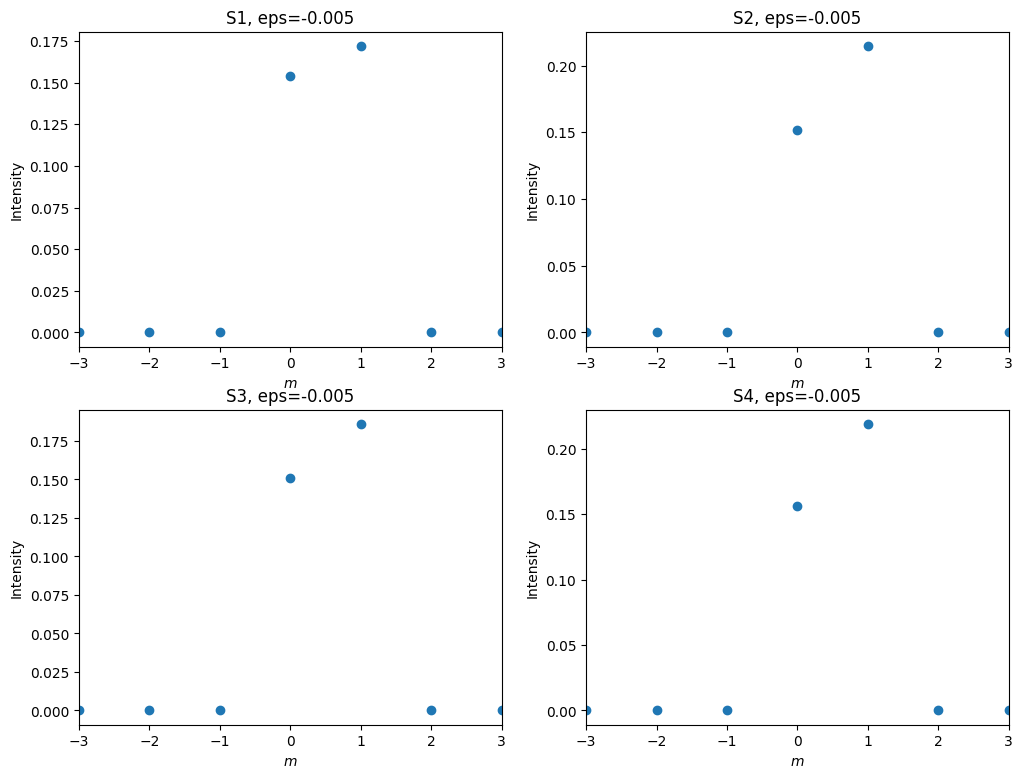

In [61]:
i = 0
plt.figure(figsize=(12, 9))
plt.subplot(221)
j = 0
solver_1d = solver_matrix[i, j]
# RPower = np.square(np.abs(solver_1d.rx)) + np.square(np.abs(solver_1d.ry)) + np.square(np.abs(solver_1d.rz))
RPower = results_matrix[i, j]["R"]
zeroOrderIndex = solver_1d.n_harmonics // 2
kx_normalized = solver_1d.kx_vector
plt.scatter(np.arange(-(N_harmonics//2), (N_harmonics//2)+1), RPower)
plt.xlim([-3, 3])
plt.xlabel(r"$m$")
plt.ylabel(r"Intensity")
plt.title(f"S1, eps={offset_arr[i]}")
plt.subplot(222)
j = 1
solver_1d = solver_matrix[i, j]
# RPower = np.square(np.abs(solver_1d.rx)) + np.square(np.abs(solver_1d.ry)) + np.square(np.abs(solver_1d.rz))
RPower = results_matrix[i, j]["R"]
zeroOrderIndex = solver_1d.n_harmonics // 2
kx_normalized = solver_1d.kx_vector
plt.scatter(np.arange(-(N_harmonics//2), (N_harmonics//2)+1), RPower)
plt.xlim([-3, 3])
plt.xlabel(r"$m$")
plt.ylabel(r"Intensity")
plt.title(f"S2, eps={offset_arr[i]}")
plt.subplot(223)
j = 2
solver_1d = solver_matrix[i, j]
# RPower = np.square(np.abs(solver_1d.rx)) + np.square(np.abs(solver_1d.ry)) + np.square(np.abs(solver_1d.rz))
RPower = results_matrix[i, j]["R"]
zeroOrderIndex = solver_1d.n_harmonics // 2
kx_normalized = solver_1d.kx_vector
plt.scatter(np.arange(-(N_harmonics//2), (N_harmonics//2)+1), RPower)
plt.xlim([-3, 3])
plt.xlabel(r"$m$")
plt.ylabel(r"Intensity")
plt.title(f"S3, eps={offset_arr[i]}")
plt.subplot(224)
j = 3
solver_1d = solver_matrix[i, j]
# RPower = np.square(np.abs(solver_1d.rx)) + np.square(np.abs(solver_1d.ry)) + np.square(np.abs(solver_1d.rz))
RPower = results_matrix[i, j]["R"]
zeroOrderIndex = solver_1d.n_harmonics // 2
kx_normalized = solver_1d.kx_vector
plt.scatter(np.arange(-(N_harmonics//2), (N_harmonics//2)+1), RPower)
plt.xlim([-3, 3])
plt.xlabel(r"$m$")
plt.ylabel(r"Intensity")
plt.title(f"S4, eps={offset_arr[i]}")

Text(0.5, 1.0, 'S4, eps=0.005')

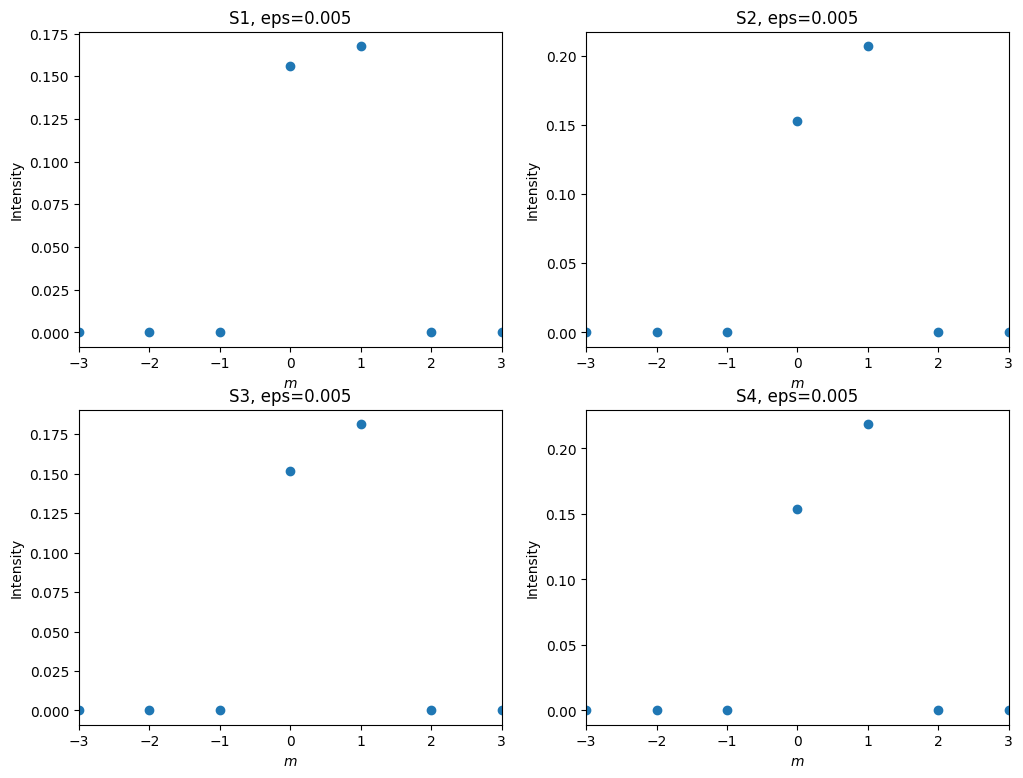

In [62]:
i = -1
plt.figure(figsize=(12, 9))
plt.subplot(221)
j = 0
solver_1d = solver_matrix[i, j]
# RPower = np.square(np.abs(solver_1d.rx)) + np.square(np.abs(solver_1d.ry)) + np.square(np.abs(solver_1d.rz))
RPower = results_matrix[i, j]["R"]
zeroOrderIndex = solver_1d.n_harmonics // 2
kx_normalized = solver_1d.kx_vector
plt.scatter(np.arange(-(N_harmonics//2), (N_harmonics//2)+1), RPower)
plt.xlim([-3, 3])
plt.xlabel(r"$m$")
plt.ylabel(r"Intensity")
plt.title(f"S1, eps={offset_arr[i]}")
plt.subplot(222)
j = 1
solver_1d = solver_matrix[i, j]
# RPower = np.square(np.abs(solver_1d.rx)) + np.square(np.abs(solver_1d.ry)) + np.square(np.abs(solver_1d.rz))
RPower = results_matrix[i, j]["R"]
zeroOrderIndex = solver_1d.n_harmonics // 2
kx_normalized = solver_1d.kx_vector
plt.scatter(np.arange(-(N_harmonics//2), (N_harmonics//2)+1), RPower)
plt.xlim([-3, 3])
plt.xlabel(r"$m$")
plt.ylabel(r"Intensity")
plt.title(f"S2, eps={offset_arr[i]}")
plt.subplot(223)
j = 2
solver_1d = solver_matrix[i, j]
# RPower = np.square(np.abs(solver_1d.rx)) + np.square(np.abs(solver_1d.ry)) + np.square(np.abs(solver_1d.rz))
RPower = results_matrix[i, j]["R"]
zeroOrderIndex = solver_1d.n_harmonics // 2
kx_normalized = solver_1d.kx_vector
plt.scatter(np.arange(-(N_harmonics//2), (N_harmonics//2)+1), RPower)
plt.xlim([-3, 3])
plt.xlabel(r"$m$")
plt.ylabel(r"Intensity")
plt.title(f"S3, eps={offset_arr[i]}")
plt.subplot(224)
j = 3
solver_1d = solver_matrix[i, j]
# RPower = np.square(np.abs(solver_1d.rx)) + np.square(np.abs(solver_1d.ry)) + np.square(np.abs(solver_1d.rz))
RPower = results_matrix[i, j]["R"]
zeroOrderIndex = solver_1d.n_harmonics // 2
kx_normalized = solver_1d.kx_vector
plt.scatter(np.arange(-(N_harmonics//2), (N_harmonics//2)+1), RPower)
plt.xlim([-3, 3])
plt.xlabel(r"$m$")
plt.ylabel(r"Intensity")
plt.title(f"S4, eps={offset_arr[i]}")

In [18]:
j = 0
solver_1d = solver_matrix[i, j]
# RPower = np.square(np.abs(solver_1d.rx)) + np.square(np.abs(solver_1d.ry)) + np.square(np.abs(solver_1d.rz))
RPower = result_matrix[i, j]["R"]
zeroOrderIndex = solver_1d.n_harmonics // 2
kx_normalized = solver_1d.kx_vector

In [19]:
RPower

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.12913062, 0.2266627 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [20]:
_, reflectedEy, _ = solver_1d.reflectedElectricComponents_1D()

In [21]:
plt.scatter(kx_normalized, reflectedEx)

NameError: name 'reflectedEx' is not defined

In [22]:
plt.scatter(kx_normalized, np.sqrt(np.square(np.abs(reflectedEx)) + np.square(np.abs(reflectedEz))))

NameError: name 'reflectedEx' is not defined

In [219]:
np.sqrt(np.square(np.abs(reflectedEx)) + np.square(np.abs(reflectedEz)))

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 4.84002465e-148, 1.49738589e-123,
       6.49597647e-100, 2.55648257e-075, 1.02150835e-051, 8.58969155e-027,
       1.78604455e-001, 4.74456971e-024, 5.03435928e-049, 1.43540354e-072,
       3.10906140e-097, 8.44466397e-121, 2.29393860e-145, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

# Let us find the linear region

In [53]:
Ry_0_matrix = np.empty((len(offset_arr), 4))

for i in range(len(offset_arr)):
    for j in range(4):
        solver_1d = solver_matrix[i, j]
        _, reflectedEy, _ = solver_1d.reflectedElectricComponents_1D()
        RPower = np.abs(reflectedEy)
        zeroOrderIndex = solver_1d.n_harmonics // 2 
        Ry_0_matrix[i, j] = RPower[zeroOrderIndex]

In [54]:
Ry_0_matrix[5]

array([0.25031631, 0.25346197, 0.24981057, 0.25039683])

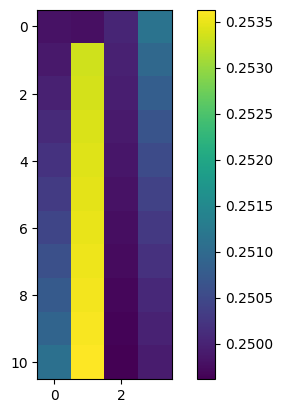

In [55]:
plt.imshow(Ry_0_matrix)
plt.colorbar()

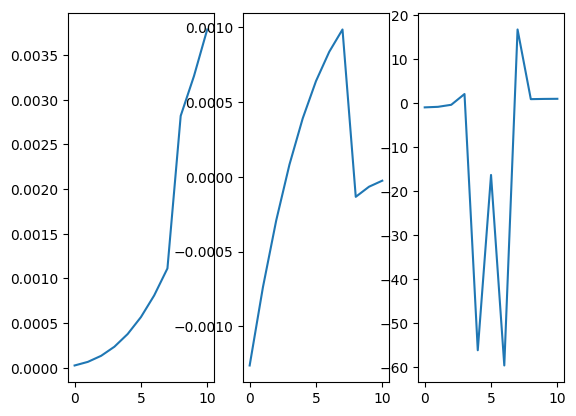

In [35]:
# D1, 2
# D1 = S1234[0] - S1234[1] # S1 - S2
# D2 = S1234[2] - S1234[3] # S3 - S4
# eps_arr[i] = f0*(D1+D2)/(D1-D2)
plt.subplot(131)
D1 = Ry_0_matrix[:,0] - Ry_0_matrix[:,1]
plt.plot(D1)
plt.subplot(132)
D2 = Ry_0_matrix[:,2] - Ry_0_matrix[:,3]
plt.plot(D2)
plt.subplot(133)
plt.plot((D1+D2)/(D1-D2))

In [ ]:
eps_arr = np.empty_like(offset_arr)
for i in range(len(offset_arr)):
    # S1, 2, 3, 4
    S1234 = np.empty((4,))
    for j in range(4):
        solver_1d = solver_matrix[i, j]
        # RPower = np.square(np.abs(solver_1d.rx)) + np.square(np.abs(solver_1d.ry)) + np.square(np.abs(solver_1d.rz))
        _, reflectedEy, _ = solver_1d.reflectedElectricComponents_1D()
        RPower = np.square(np.abs(reflectedEy))
        zeroOrderIndex = solver_1d.n_harmonics // 2
        S1234[j] = RPower[zeroOrderIndex]
    # D1, 2
    D1 = S1234[0] - S1234[1] # S1 - S2
    D2 = S1234[2] - S1234[3] # S3 - S4
    eps_arr[i] = f0*(D1+D2)/(D1-D2)

# Plotting the Kx, Ky matrices

In [48]:
kx_normalized = solver_1d.kx_vector
ky_normalized = solver_1d.ky_vector

Text(0, 0.5, 'Im$(k_{x, m})$')

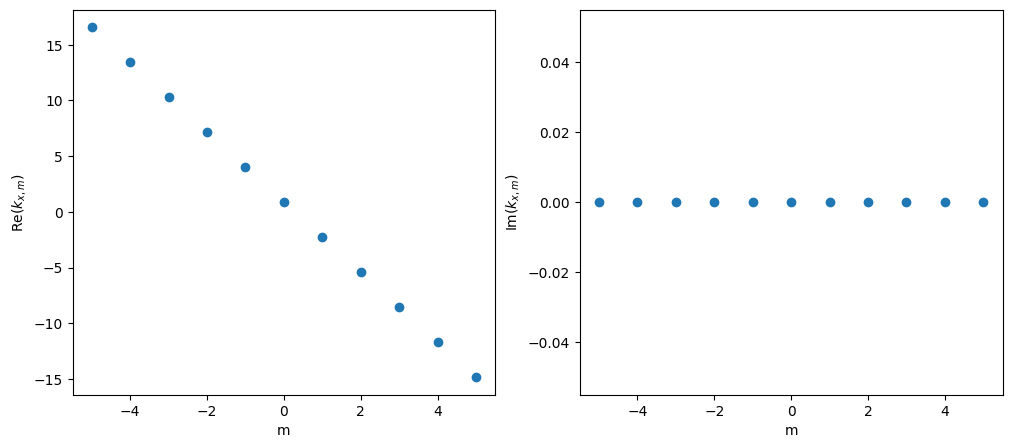

In [47]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(np.arange(-5, 6), np.real(kx_normalized))
plt.xlabel("m")
plt.ylabel(r"Re$(k_{x, m})$")
plt.subplot(122)
plt.scatter(np.arange(-5, 6), np.imag(kx_normalized))
plt.xlabel("m")
plt.ylabel(r"Im$(k_{x, m})$")

Text(0, 0.5, 'Im$(k_{y, n})$')

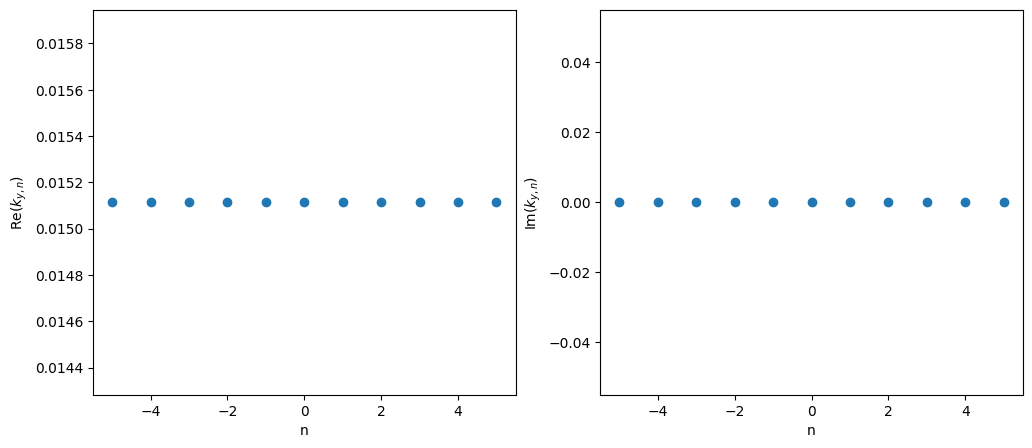

In [49]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(np.arange(-5, 6), np.real(ky_normalized))
plt.xlabel("n")
plt.ylabel(r"Re$(k_{y, n})$")
plt.subplot(122)
plt.scatter(np.arange(-5, 6), np.imag(ky_normalized))
plt.xlabel("n")
plt.ylabel(r"Im$(k_{y, n})$")

Since our grating is only defined in 1D in the x direction, it makes sense for there to be only 1 $k_y$ component.

# Visualizing the S-matrix

| Component of the S-matrix | Meaning |
|---|---|
| `S[0, 0]` | Reflection | 
| `S[1, 0]` | Transmission | 


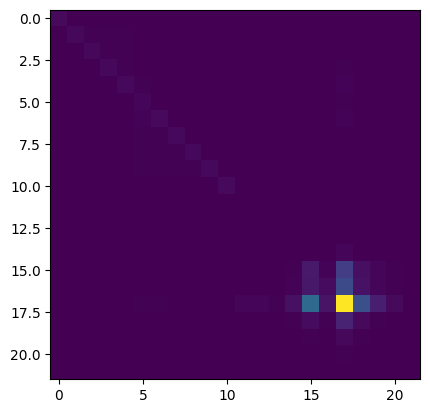

In [50]:
plt.imshow(np.abs(solver_1d.SGlobal[0, 0]))

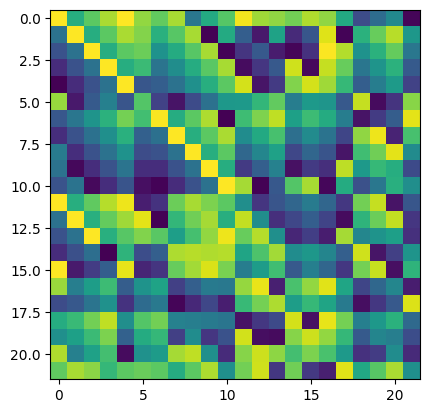

In [51]:
plt.imshow(np.angle(solver_1d.SGlobal[0, 0]))

def s_incident(source, n_harmonics: Union[int, ArrayLike]):
    totalNumberHarmonics = np.prod(n_harmonics)
    return np.hstack((source.pX * kroneckerDeltaVector(totalNumberHarmonics),
            source.pY * kroneckerDeltaVector(totalNumberHarmonics)))


# Angular spectrum decomposition of the reflected waves $A(k_x, k_y)$

In [54]:
reflectedEx, reflectedEy, reflectedEz = solver_1d.reflectedElectricComponents_1D()

/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0, 0.5, '$Phase(E_x)$')

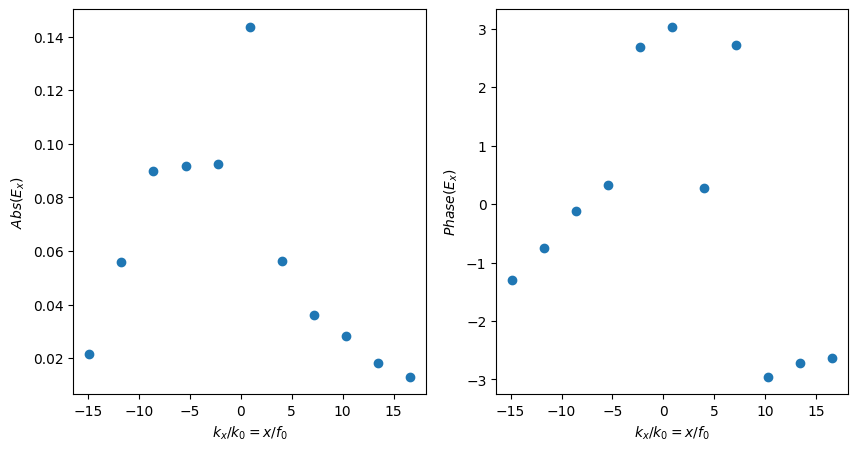

In [55]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(kx_normalized, np.abs(reflectedEx))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"$Abs(E_x)$")
plt.subplot(122)
plt.scatter(kx_normalized, np.angle(reflectedEx))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"$Phase(E_x)$")

/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0, 0.5, '$Phase(E_y)$')

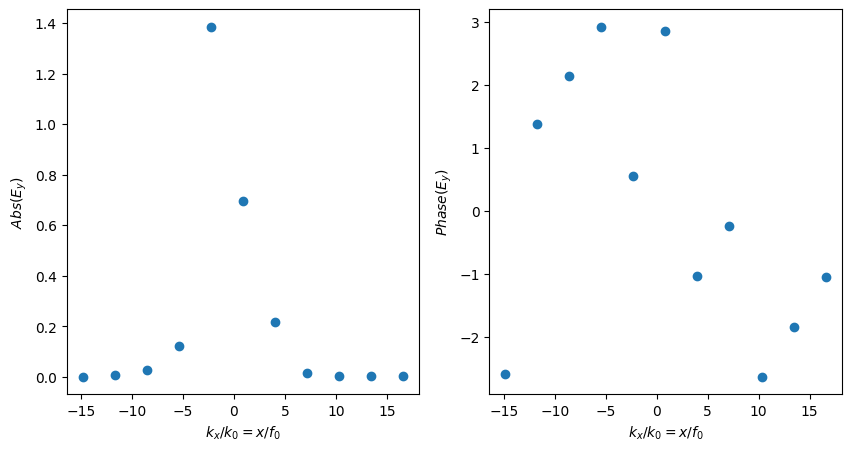

In [56]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(kx_normalized, np.abs(reflectedEy))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"$Abs(E_y)$")
plt.subplot(122)
plt.scatter(kx_normalized, np.angle(reflectedEy))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"$Phase(E_y)$")

/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0, 0.5, '$Phase(E_z)$')

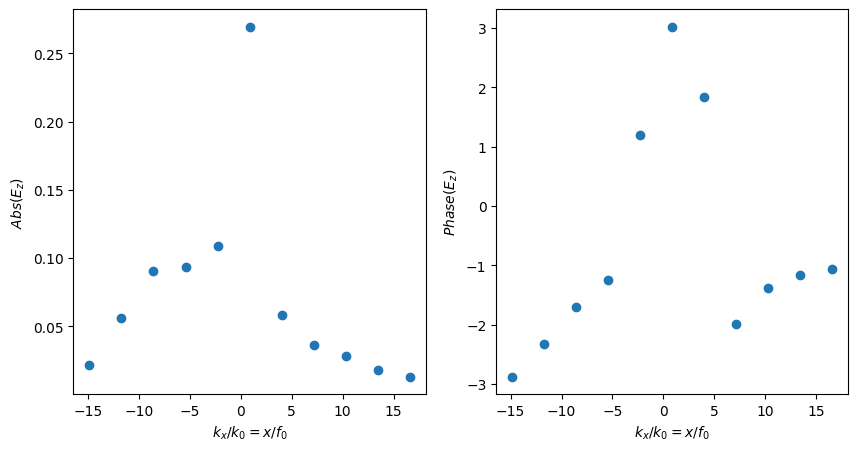

In [57]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(kx_normalized, np.abs(reflectedEz))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"$Abs(E_z)$")
plt.subplot(122)
plt.scatter(kx_normalized, np.angle(reflectedEz))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"$Phase(E_z)$")

/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0, 0.5, 'Intensity')

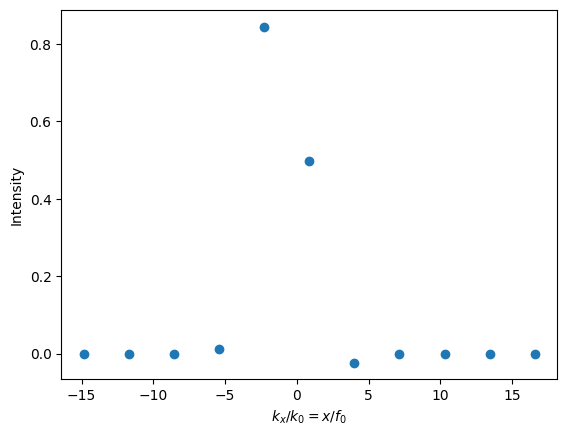

In [73]:
ReflectedHarmonicsIntensity = np.square(reflectedEx) + np.square(reflectedEy) + + np.square(reflectedEz)
plt.scatter(kx_normalized, ReflectedHarmonicsIntensity)
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"Intensity")

/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0.5, 1.0, 'Calculated by RCWA')

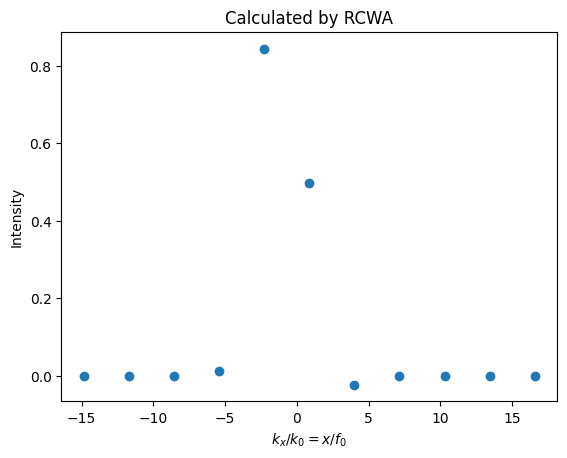

In [61]:
plt.scatter(kx_normalized, np.square(solver_1d.rx) + np.square(solver_1d.ry) + np.square(solver_1d.rz))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"Intensity")
plt.title("Calculated by RCWA")

In [1]:
45*deg

NameError: name 'deg' is not defined